<div style="text-align:center"><b>파이썬 데이터 분석 중간보고</b>
<div style="text-align:right">202104275 이서용<br>202104128 강성빈<br>202004244 한윤수
<br><br>
<div style="text-align:left">저희 조는 부동산 가격 흐름을 읽어보고, 상승 또는 하락한 연도에 금리, 대중교통 증차 등의 데이터를 모아 원인분석을 하고 있습니다.<br>
아래는 간단히 분석해본 과정입니다.

In [18]:
#필요 자원 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# 한글 폰트 설정 (macOS의 경우)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


<br>아래의 과정은 열 삭제, 정수값 변환, 결측치 처리 등의 과정입니다.<br><br>

In [31]:
df1 = pd.read_csv('D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/서울시 부동산 실거래가 정보 (2023).csv', encoding='cp949')
df2 = pd.read_csv('D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/서울시 부동산 실거래가 정보 (2022).csv', encoding='cp949')
df3 = pd.read_csv('D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/서울시 부동산 실거래가 정보 (2021).csv', encoding='cp949')
df4 = pd.read_csv('D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/서울시 부동산 실거래가 정보 (2020).csv', encoding='cp949')
df5 = pd.read_csv('D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/예금은행 대출금리(신규취급액 기준)_08141539.csv')

C:\Users\iblue\AppData\Local\Temp\ipykernel_17844\1185459611.py:4: DtypeWarning: Columns (7,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/서울시 부동산 실거래가 정보 (2021).csv', encoding='cp949')
C:\Users\iblue\AppData\Local\Temp\ipykernel_17844\1185459611.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/서울시 부동산 실거래가 정보 (2020).csv', encoding='cp949')


In [87]:
# 2021, 2022, 2023열만 남기기
df5 = df5[['2021', '2022', '2023']]
df5

,2021,2022,2023
0,2.88,4.29,5.19


In [35]:
# '건축년도' 열 삭제
df1 = df1.drop(columns=['건축년도'], errors='ignore')
df2 = df2.drop(columns=['건축년도'], errors='ignore')
df3 = df3.drop(columns=['건축년도'], errors='ignore')
df4 = df4.drop(columns=['건축년도'], errors='ignore')

In [37]:
# '물건금액(만원)'열 문자열 -> 숫자로 변환
df1['물건금액(만원)'] = pd.to_numeric(df1['물건금액(만원)'], errors='coerce')
df2['물건금액(만원)'] = pd.to_numeric(df2['물건금액(만원)'], errors='coerce')
df3['물건금액(만원)'] = pd.to_numeric(df3['물건금액(만원)'], errors='coerce')
df4['물건금액(만원)'] = pd.to_numeric(df4['물건금액(만원)'], errors='coerce')

In [39]:
# 결측치 제거
df1 = df1.dropna(subset=['물건금액(만원)'])
df2 = df2.dropna(subset=['물건금액(만원)'])
df3 = df3.dropna(subset=['물건금액(만원)'])
df4 = df4.dropna(subset=['물건금액(만원)'])

In [41]:
# 연도별 평균 거래 금액 계산
avg_price_2023 = df1['물건금액(만원)'].mean()
avg_price_2022 = df2['물건금액(만원)'].mean()
avg_price_2021 = df3['물건금액(만원)'].mean()
avg_price_2020 = df4['물건금액(만원)'].mean()

In [43]:
# Step 6: df5에 2020년 데이터 추가
df5['2020'] = 2.80  # 2020년 대출금리 추가
df5 = df5[['2020', '2021', '2022', '2023']]  # 열 순서 정렬

# Step 7: 데이터 준비
years = ['2020', '2021', '2022', '2023']
avg_prices = [avg_price_2020, avg_price_2021, avg_price_2022, avg_price_2023]
loan_rates = df5.iloc[0].values  # 대출금리 데이터 (2020, 2021, 2022, 2023)


<br>시각화에 필요한 데이터가 준비되었으니 그래프를 그려보도록 하겠습니다.<br>
부동산 연 평균 거래가는 파란색으로, 금리 변화는 빨간색 선 그래프로 그려보았습니다.
<br><br>

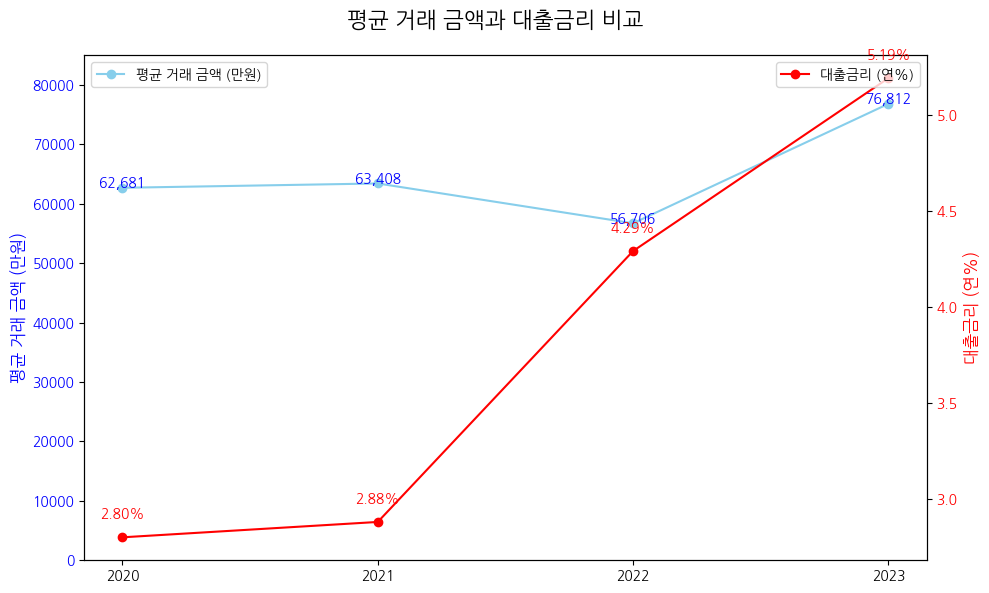

In [92]:
# 그래프 시각화 틀
fig, ax1 = plt.subplots(figsize=(10, 6))

# 평균 거래 금액
bars = ax1.plot(years, avg_prices, marker='o',color='skyblue', label='평균 거래 금액 (만원)')
ax1.set_ylabel('평균 거래 금액 (만원)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 85000) # y축 최소, 최대 제한

# 대출금리
ax2 = ax1.twinx()
ax2.plot(years, loan_rates, marker='o', color='red', label='대출금리 (연%)')
ax2.set_ylabel('대출금리 (연%)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 평균 거래 그래프 위에 데이터값 표시
for x, y in zip(years, avg_prices):
    ax1.text(x, y + 100, f"{y:,.0f}", ha='center', fontsize=10, color='blue')

# 대출금리 그래프 위에 데이터값 표시
for x, y in zip(years, loan_rates):
    ax2.text(x, y + 0.1, f"{y:.2f}%", ha='center', fontsize=10, color='red')

# 제목 및 범례
fig.suptitle('평균 거래 금액과 대출금리 비교', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<br>
다음은 위에 데이터 전처리의 과정을 거친 후 다시 저장해둔 아직 사용하지 않은 데이터셋 입니다.<br><br>

In [125]:
df_bus = pd.read_csv("D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/서울시 시내버스 노선별 일별 운행거리.csv", encoding='cp949')
df_stationLocation = pd.read_csv("D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/서울시 역사마스터 정보.csv", encoding='cp949')
df_population = pd.read_csv("D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/월별+인구추이(등록인구)_20250408091706.csv", encoding='utf-8-sig')
df_subway = pd.read_csv("D:/학교/3-1/파이썬데이터분석/프로젝트_파일/전처리_후_파일/지하철+운행현황_20250408091311.csv", encoding='utf-8-sig')


In [119]:
df_bus.head()

,운행일자,노선명,운행건수,운행거리
0,20221102,5517,90.0,3335.188
1,20221102,2015,150.0,4460.715
2,20221102,7713,108.0,2847.357
3,20221102,6647,126.0,2953.251
4,20221102,2222,111.0,2236.428


In [121]:
df_stationLocation.head()

,역사_ID,역사명,호선,위도,경도
0,9010,동탄,수도권 광역급행철도,37.20034,127.09569
1,9009,구성,수도권 광역급행철도,37.29913,127.10389
2,9008,성남,수도권 광역급행철도,37.39467,127.12058
3,9007,수서,수도권 광역급행철도,37.48637,127.10161
4,9006,삼성,수도권 광역급행철도,37.50887,127.06324


In [127]:
df_population.head()

,시점,세대소계,인구소계,남자,여자,소계,남자.1,여자.1,소계.1,남자.2,여자.2
0,2020. 01,4334918,10017015,4879357,5137658,9733509,4745088,4988421,283506,134269,149237
1,2020. 02,4345877,10020007,4879577,5140430,9736962,4745133,4991829,283045,134444,148601
2,2020. 03,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348
3,2020. 04,4361645,10002646,4869096,5133550,9726787,4737843,4988944,275859,131253,144606
4,2020. 05,4373610,9990932,4863397,5127535,9724496,4735431,4989065,266436,127966,138470


In [135]:
df_subway

,구분별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2021,2021.1,...,2022.2,2022.3,2022.4,2022.5,2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,구분별(2),운행노선및구간,영업거리 (㎞),역수 (개),평일운행회수 (회),연간총수송인원 (천명),1일평균 -수송인원 (천명),최대혼잡도 (%),영업거리 (㎞),역수 (개),...,평일운행회수 (회),연간총수송인원 (천명),1일평균 -수송인원 (천명),최대혼잡도 (%),영업거리 (㎞),역수 (개),평일운행회수 (회),연간총수송인원 (천명),1일평균 -수송인원 (천명),최대혼잡도 (%)
1,소계,10개노선,357.6,331,4044,2127219,5825,-,359.9,335,...,5269,2403878,6611,-,371.7,337,5293,2632191,7211,-
2,소계,계,306,280,3089,1934464,5297,113.2,308.3,284,...,3901,2153710,5901,146.6,312.3,275,3913,2351422,6442,136.2
3,1호선,서울역~청량리,8,10,86,115584,316,80.9,7.8,10,...,589,128041,351,107.8,7.8,10,588,144647,396,109.1
4,2호선,순환및2지선,60.2,50,954,577744,1579,127.7,60.2,50,...,974,644871,1767,-,60.2,50,974,701063,1921,-
5,2호선,성수~성수,48.8,43,524,565232,1545,127.7,48.8,43,...,528,630324,1727,172.3,48.8,43,528,685607,1879,144
6,2호선,신설동~성수,5.4,4,218,4221,11,60.5,5.4,4,...,226,3912,11,85.3,5.4,4,226,5249,14,81.4
7,2호선,신도림~까치산,6,3,212,8291,23,102.5,6,3,...,220,10635,29,123.6,6,3,220,10207,28,115.5
8,3호선,지축~오금,38.2,34,272,235105,642,110.7,38.2,34,...,407,266773,731,154.8,38.2,34,407,290572,796,140.1
9,4호선,당고개~남태령,31.7,26,307,222536,608,131.4,31.1,26,...,469,248951,682,185.5,45.4,26,480,279191,765,166.2


앞으로 이 데이터들을 활용하여 거래가가 감소된 연도의 특징을 알기 위해<br><b>1) </b>매물을 지역구 별로 나누어 그 지역구를 지나가는 지하철<br><b>2) </b>버스의 노선 차량수의 증감<br><b>3) </b>팔린 매물의 층수<br><b>4) </b>각 지역구 내의 지하철 역사 이용객 연/월 평균의 변화<br>등을 추가로 분석해 볼 예정입니다.<br>
이에 따라 분석 결과로 특징을 도출하여 앞으로 올라갈 가능성이 있는 지역을 찾는 등의 활용이 가능하다고 생각합니다.